In [1]:
import glob

# read data

## Gastruloid tomo-seq data

In [2]:
gndfs = [read_csv(f, sep = '\t', index_col=0) for f in ['../mG01_E08_5dAA_lngf.normfilt.coutt.tsv.gz',
                                                       '../mG02_F08_5dAA_lngf.normfilt.coutt.tsv.gz',
                                                       '../mG03_B10_5dAA_lngf.normfilt.coutt.tsv.gz']]

In [3]:
gzdfs = [read_csv(f, sep = '\t', index_col=0) for f in ['../mG01_E08_5dAA_lngf.zscore.coutt.tsv.gz',
                                                       '../mG02_F08_5dAA_lngf.zscore.coutt.tsv.gz',
                                                       '../mG03_B10_5dAA_lngf.zscore.coutt.tsv.gz']]

In [4]:
avgzdf = read_csv('../mGav_Lfng_zscores.tsv.gz', sep = '\t', index_col=0)

In [5]:
for df in gndfs:
    df.index = [idx.rsplit('_')[1] for idx in df.index]

for df in gzdfs:
    df.index = [idx.rsplit('_')[1] for idx in df.index]

In [6]:
gndfs[0].head()

,01-mG01,02-mG01,03-mG01,04-mG01,05-mG01,06-mG01,07-mG01,08-mG01,09-mG01,10-mG01,...,44-mG01,45-mG01,46-mG01,47-mG01,48-mG01,49-mG01,50-mG01,51-mG01,52-mG01,53-mG01
Gnai3,35.112845,14.657519,5.554321,12.675981,11.055624,16.681946,16.145159,11.298036,14.332721,16.644547,...,17.623799,13.335041,18.296481,18.175186,11.416728,23.272788,17.934420,14.607543,11.145728,16.261624
Cdc45,2.926070,9.771679,0.000000,3.168995,8.598818,8.649898,5.698292,13.905275,6.854780,14.425274,...,14.099039,9.196580,9.758123,9.622157,4.994818,12.101850,18.989386,11.564304,4.458291,4.065406
H19,383.315223,483.698131,522.106207,518.130726,503.645079,445.469746,508.097665,651.809749,596.989002,775.635892,...,281.099587,249.687140,215.898476,261.936500,217.631372,98.909351,232.092497,173.464567,169.415067,162.616237
Scml2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.623162,2.219273,...,0.440595,0.919658,0.000000,1.069129,0.713545,0.000000,0.000000,0.000000,0.000000,0.000000
Narf,0.000000,0.000000,0.000000,1.584498,0.000000,3.089249,0.000000,1.738159,0.623162,1.109636,...,1.321785,2.299145,1.219765,0.000000,0.713545,0.698184,3.164898,3.043238,4.458291,0.000000


# mouse tomo-seq data

In [7]:
mndfs = [read_csv(f, sep = '\t', index_col=0) for f in ['../../mEmbryo-tomo/E775_rep1_unbatch_norm.coutt.tsv.gz',
                                                       '../../mEmbryo-tomo/E875_rep1_unbatch_norm.coutt.tsv.gz',
                                                       '../../mEmbryo-tomo/E875_rep2_unbatch_norm.coutt.tsv.gz']]

In [8]:
def zscore(df):
    df = df.loc[df.index[df.sum(axis=1)>0]]
    zdf = df.T
    zdf = (zdf-zdf.mean())/zdf.std()
    zdf = zdf.T
    return zdf

def scalezscore(zdf):
    df  = ((zdf.T>=0)*zdf.T/zdf.max(axis=1) + (zdf.T<0)*zdf.T/abs(zdf.min(axis=1))).T
    return df

In [9]:
mzdfs = [zscore(df) for df in mndfs]

In [10]:
for df in mndfs:
    df.index = [idx.rsplit('_')[1] for idx in df.index]

for df in mzdfs:
    df.index = [idx.rsplit('_')[1] for idx in df.index]

## Single cell data

In [11]:
files = glob.glob('../../../../data/all-mGst-10xSCmergeSORTseq/results/manual_celltype_annotation/option1/dex_cl*option1.tsv')

In [12]:
markers = {f.rsplit('dex_cl_')[1].rsplit('_option1.tsv')[0]: read_csv(f, sep = '\t', index_col = 0) for f in files}

In [13]:
for f in markers:
    markers[f] = markers[f][markers[f]['logfoldchanges']>1.01]

In [14]:
markers.keys()

dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13'])

In [17]:
markers['01'].head()

,logfoldchanges,pvals,pvals_adj,scores,rank
names,,,,,
Hand2,7.898910,8.060829e-55,1.595054e-52,16.787678,1
Rgs5,7.252191,7.067637e-36,8.510592e-34,13.108127,2
Isl1,5.634771,1.172188e-96,5.085042e-94,23.854450,3
Tbx1,5.494080,7.407728e-35,8.613584e-33,12.891840,4
Gata6,5.476980,2.291746e-105,1.193013e-102,25.246168,5


In [18]:
pvth = 0.1

for cl in markers:
    dx = markers[cl]
    dx = dx[(dx['pvals']<pvth)&(dx['logfoldchanges']>1.01)]
    dx = dx.sort_values(by='scores', ascending=False)
    dx = dx.sort_values(by='logfoldchanges', ascending=False)
    dx['rank'] = range(1,len(dx)+1)
    markers[cl] = dx

# plot single cell data in gastruloid data

01


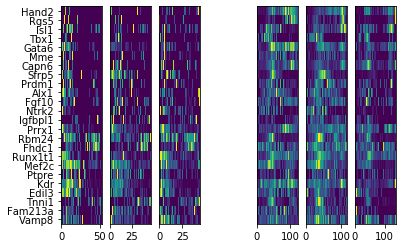

02


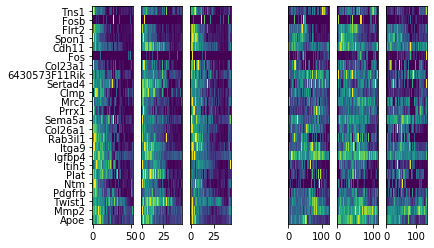

03


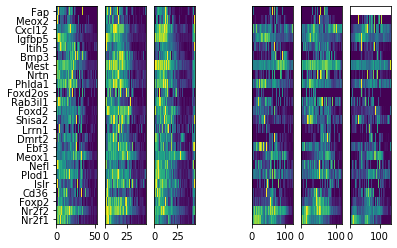

04


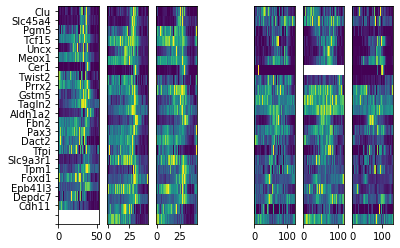

05


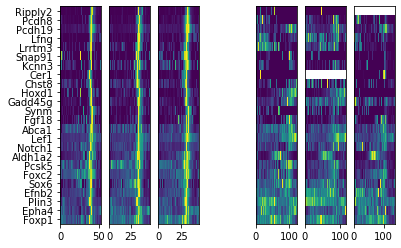

06


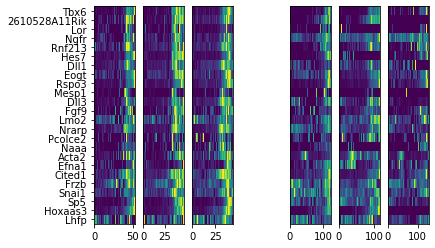

07


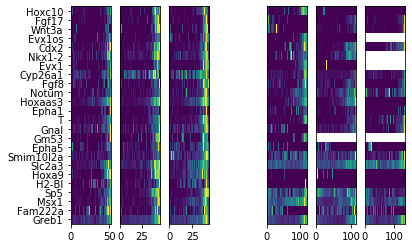

08


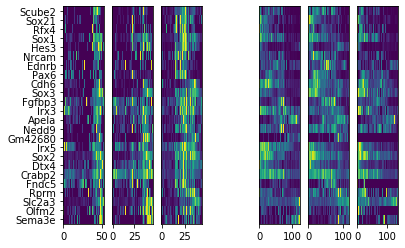

09


/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.
/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


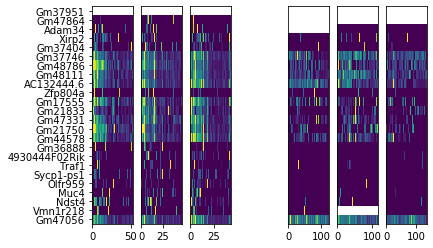

10


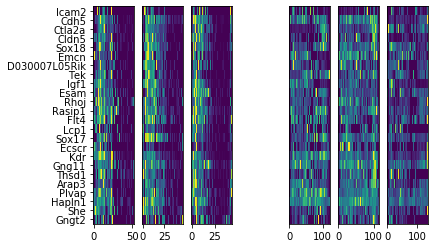

11


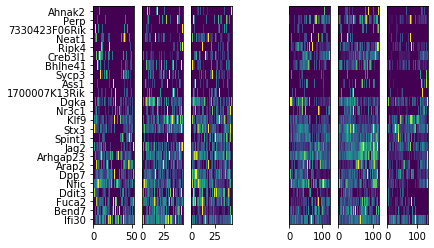

12


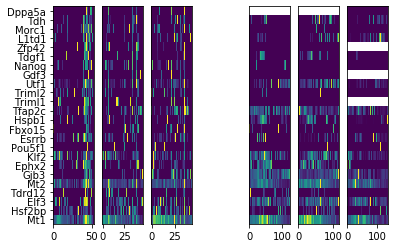

13


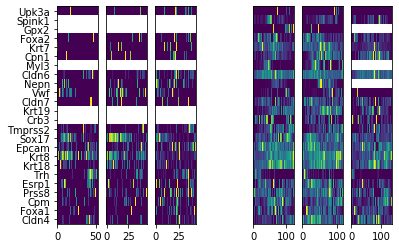

In [20]:
ng = 24
for cl in markers:
    genes = markers[cl].index[:ng]
    print(cl)
    i = 0
    for df in gndfs:
        i += 1
        plt.subplot(1,7,i)
#        plt.imshow(scalezscore(df.loc[markers[cl].index[:ng]]), aspect = 'auto')
        sdf = (df.loc[markers[cl].index[:ng]].T/df.loc[markers[cl].index[:ng]].T.max()).T
        plt.imshow(sdf, aspect = 'auto')
        if i == 1:
            plt.yticks(range(ng), genes)
        else: 
            plt.yticks([])
                
    i += 1
    for df in mndfs:
        i += 1
        plt.subplot(1,7,i)
        sdf = (df.loc[markers[cl].index[:ng]].T/df.loc[markers[cl].index[:ng]].T.max()).T
        plt.imshow(sdf, aspect = 'auto')    
        plt.yticks([])
#    plt.savefig('../results/single_cell_locs/option1_' + cl + '.pdf', bbox_inches = 'tight')
    plt.show()

In [21]:
avgzdf.index = [g.rsplit('_')[1] for g in avgzdf.index]

In [22]:
mycolors = ["#008941", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059", "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#FFB500", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80", "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100", "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F", "#372101", "#FF0000", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09"]

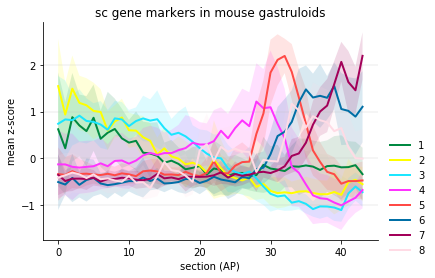

In [24]:
ng = 24
fig, ax = plt.subplots(ncols=1, nrows=1)
for cl in  [1,2,3,4,5,6,7,8]:
    genes = markers[str(cl).zfill(2)].index[:ng]
    mu = avgzdf.loc[genes].mean()
    mup = avgzdf.loc[genes].mean() + avgzdf.loc[genes].std()
    mum = avgzdf.loc[genes].mean() - avgzdf.loc[genes].std()
    ax.plot(avgzdf.columns, mu, c= mycolors[cl-1], lw = 2, label = cl)
    ax.fill_between(avgzdf.columns, mup, mum, facecolor=mycolors[cl-1], interpolate=True, alpha = 0.15)
ax.legend(loc = 2, frameon = False, bbox_to_anchor = (1.01,0.5))
ax.set_ylabel('mean z-score')
ax.set_xticks(avgzdf.columns[::10])
ax.set_xticklabels([i for i in avgzdf.columns[::10]])
ax.set_xlabel('section (AP)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(which = 'major', axis = 'y', c = 'silver', lw = 0.3)
plt.title('sc gene markers in mouse gastruloids')
#plt.savefig('../results/single_cell_locs/lineplots_mesoderm.pdf', bbox_inches = 'tight')
plt.show()

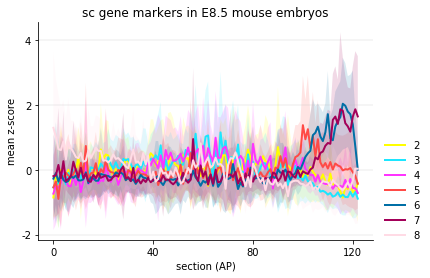

In [25]:
ng = 24
fig, ax = plt.subplots(ncols=1, nrows=1)
for cl in  [2,3,4,5,6,7,8]:
    genes = markers[str(cl).zfill(2)].index[:ng]
    mu = mzdfs[0].loc[genes].mean()
    mup = mzdfs[0].loc[genes].mean() + mzdfs[0].loc[genes].std()
    mum = mzdfs[0].loc[genes].mean() - mzdfs[0].loc[genes].std()
    ax.plot(mzdfs[0].columns, mu, c= mycolors[cl-1], lw = 2, label = cl)
    ax.fill_between(mzdfs[0].columns, mup, mum, facecolor=mycolors[cl-1], interpolate=True, alpha = 0.15)
ax.legend(loc = 2, frameon = False, bbox_to_anchor = (1.01,0.5))
ax.set_ylabel('mean z-score')
ax.set_yticks([-2,0,2,4])
ax.set_yticklabels([-2,0,2,4])
ax.set_xticks(range(len(mzdfs[0].columns))[::40])
ax.set_xticklabels(range(len(mzdfs[0].columns))[::40])
ax.set_xlabel('section (AP)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(which = 'major', axis = 'y', c = 'silver', lw = 0.3)
plt.title('sc gene markers in E8.5 mouse embryos')

#plt.savefig('../results/single_cell_locs/lineplots_embryo_mesoderm.pdf', bbox_inches = 'tight')
plt.show()

/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org

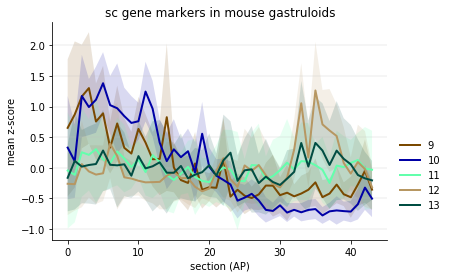

In [26]:
ng = 24
fig, ax = plt.subplots(ncols=1, nrows=1)
for cl in  [9,10,11,12,13]:
    genes = markers[str(cl).zfill(2)].index[:ng]
    mu = avgzdf.loc[genes].mean()
    mup = avgzdf.loc[genes].mean() + avgzdf.loc[genes].std()
    mum = avgzdf.loc[genes].mean() - avgzdf.loc[genes].std()
    ax.plot(avgzdf.columns, mu, c= mycolors[cl-1], lw = 2, label = cl)
    ax.fill_between(avgzdf.columns, mup, mum, facecolor=mycolors[cl-1], interpolate=True, alpha = 0.15)
ax.legend(loc = 2, frameon = False, bbox_to_anchor = (1.01,0.5))
ax.set_ylabel('mean z-score')
ax.set_xticks(avgzdf.columns[::10])
ax.set_xticklabels([i for i in avgzdf.columns[::10]])
ax.set_xlabel('section (AP)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(which = 'major', axis = 'y', c = 'silver', lw = 0.3)
plt.title('sc gene markers in mouse gastruloids')
#plt.savefig('../results/single_cell_locs/lineplots_gastruloid_outliers.pdf', bbox_inches = 'tight')
plt.show()

/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org

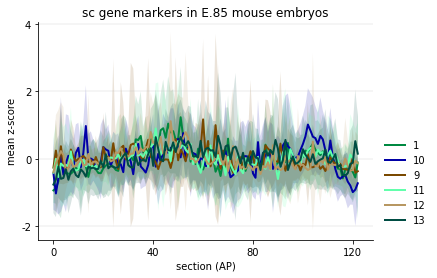

In [27]:
ng = 24
fig, ax = plt.subplots(ncols=1, nrows=1)
for cl in  [1,10,9,11,12,13]:
    genes = markers[str(cl).zfill(2)].index[:ng]
    mu = mzdfs[0].loc[genes].mean()
    mup = mzdfs[0].loc[genes].mean() + mzdfs[0].loc[genes].std()
    mum = mzdfs[0].loc[genes].mean() - mzdfs[0].loc[genes].std()
    ax.plot(mzdfs[0].columns, mu, c= mycolors[cl-1], lw = 2, label = cl)
    ax.fill_between(mzdfs[0].columns, mup, mum, facecolor=mycolors[cl-1], interpolate=True, alpha = 0.15)
ax.legend(loc = 2, frameon = False, bbox_to_anchor = (1.01,0.5))
ax.set_ylabel('mean z-score')
ax.set_yticks([-2,0,2,4])
ax.set_yticklabels([-2,0,2,4])
ax.set_xticks(range(len(mzdfs[0].columns))[::40])
ax.set_xticklabels(range(len(mzdfs[0].columns))[::40])
ax.set_xlabel('section (AP)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(which = 'major', axis = 'y', c = 'silver', lw = 0.3)
plt.title('sc gene markers in E.85 mouse embryos')
#plt.savefig('../results/single_cell_locs/lineplots_embryo_outliers.pdf', bbox_inches = 'tight')
plt.show()

In [28]:
ng = 24
sdf = pd.DataFrame({cl: avgzdf.loc[markers[cl].index[:ng]].mean()for cl in  markers.keys()})


/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [31]:
sdf.head()

,01,02,03,04,05,06,07,08,09,10,11,12,13
0,0.620281,1.544612,0.738161,-0.132271,-0.339938,-0.510616,-0.357520,-0.417324,0.652057,0.328984,-0.046484,-0.262606,-0.164882
1,0.212944,0.936256,0.831414,-0.133114,-0.357204,-0.564787,-0.489360,-0.365803,0.871692,0.105874,-0.117178,-0.268986,0.111182
2,0.879185,1.491082,0.815726,-0.184457,-0.277586,-0.422398,-0.438689,-0.308167,1.165588,1.173500,0.253063,0.059101,0.018130
3,0.701784,1.186537,0.911800,-0.201474,-0.338141,-0.570615,-0.437998,-0.346375,1.303059,0.992466,0.211012,-0.060698,0.044661
4,0.581053,1.133917,0.798550,-0.185722,-0.331993,-0.466916,-0.445152,-0.425795,0.755469,1.112645,0.304299,-0.112194,0.060747


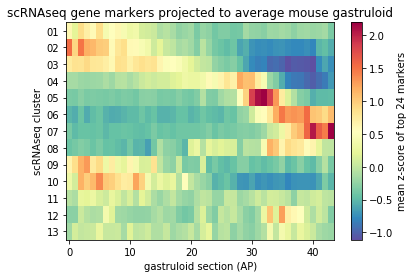

In [35]:
fig, ax = plt.subplots(ncols = 1, nrows=1)
im = ax.imshow(sdf.T, aspect = 'auto', cmap = 'Spectral_r')
ax.set_xticks([0,10,20,30,40])
ax.set_yticks(range(len(sdf.columns)))
ax.set_yticklabels(sdf.columns)
ax.set_xlabel('gastruloid section (AP)')
ax.set_ylabel('scRNAseq cluster')
fig.colorbar(im, label = 'mean z-score of top 24 markers')
plt.title('scRNAseq gene markers projected to average mouse gastruloid')
#plt.savefig('../results/lineplots/heatmap_scdata_projected.pdf', bbox_inches = 'tight')
sdf.to_csv('../results/lineplots/heatmap_scdata_projected.tsv', sep = '\t')
plt.show()

In [32]:
writer = pd.ExcelWriter('../WritingPapers/4thSubmission_Nature/source_data/edf3e.xlsx', engine='xlsxwriter')
(sdf.T).to_excel(writer, sheet_name = 'mean z-score')
writer.close()